In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as ag1
import utils

%matplotlib inline

In [2]:
sns.set_context('talk')
sns.set_style('dark')

In [3]:
ordering = np.load('ordering.npz')
print ordering['params']
print ordering['values']

sizes = [len(l) for l in ordering['values']]
print sizes

[[u'network', u'Nc'] [u'stimulus', u'jitter', u'peak']
 [u'connectivity', u'Wcc_factor']]
[[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
 [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
 [1.0, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000004, 1.5000000000000004, 1.6000000000000005, 1.7000000000000006, 1.8000000000000007, 1.9000000000000008, 2.000000000000001]]
[10, 11, 11]


In [6]:
data = np.zeros([4] + sizes)
for i in xrange(sizes[0]):
    inds_init = [0, ordering['values'][0][i], 4000, 5000]
    for j in xrange(sizes[1]):
        for k in xrange(sizes[2]):
            results = np.load('result-{}-{}-{}.npz'.format(i, j, k))
            
            diffs = results['spike_scores_post'] - results['spike_scores_pre']
            ablated = results['ablated']
            
            diffs = np.delete(diffs, ablated)
            
            inds = utils.newInds(inds_init, ablated)
            data[:3,i,j,k] = [np.mean(diffs[inds[l]:inds[l+1]]) for l in xrange(len(inds)-1)]
            data[3,i,j,k] = np.mean(diffs[inds[0]:inds[2]])

In [7]:
#np.save('data.npy', data)

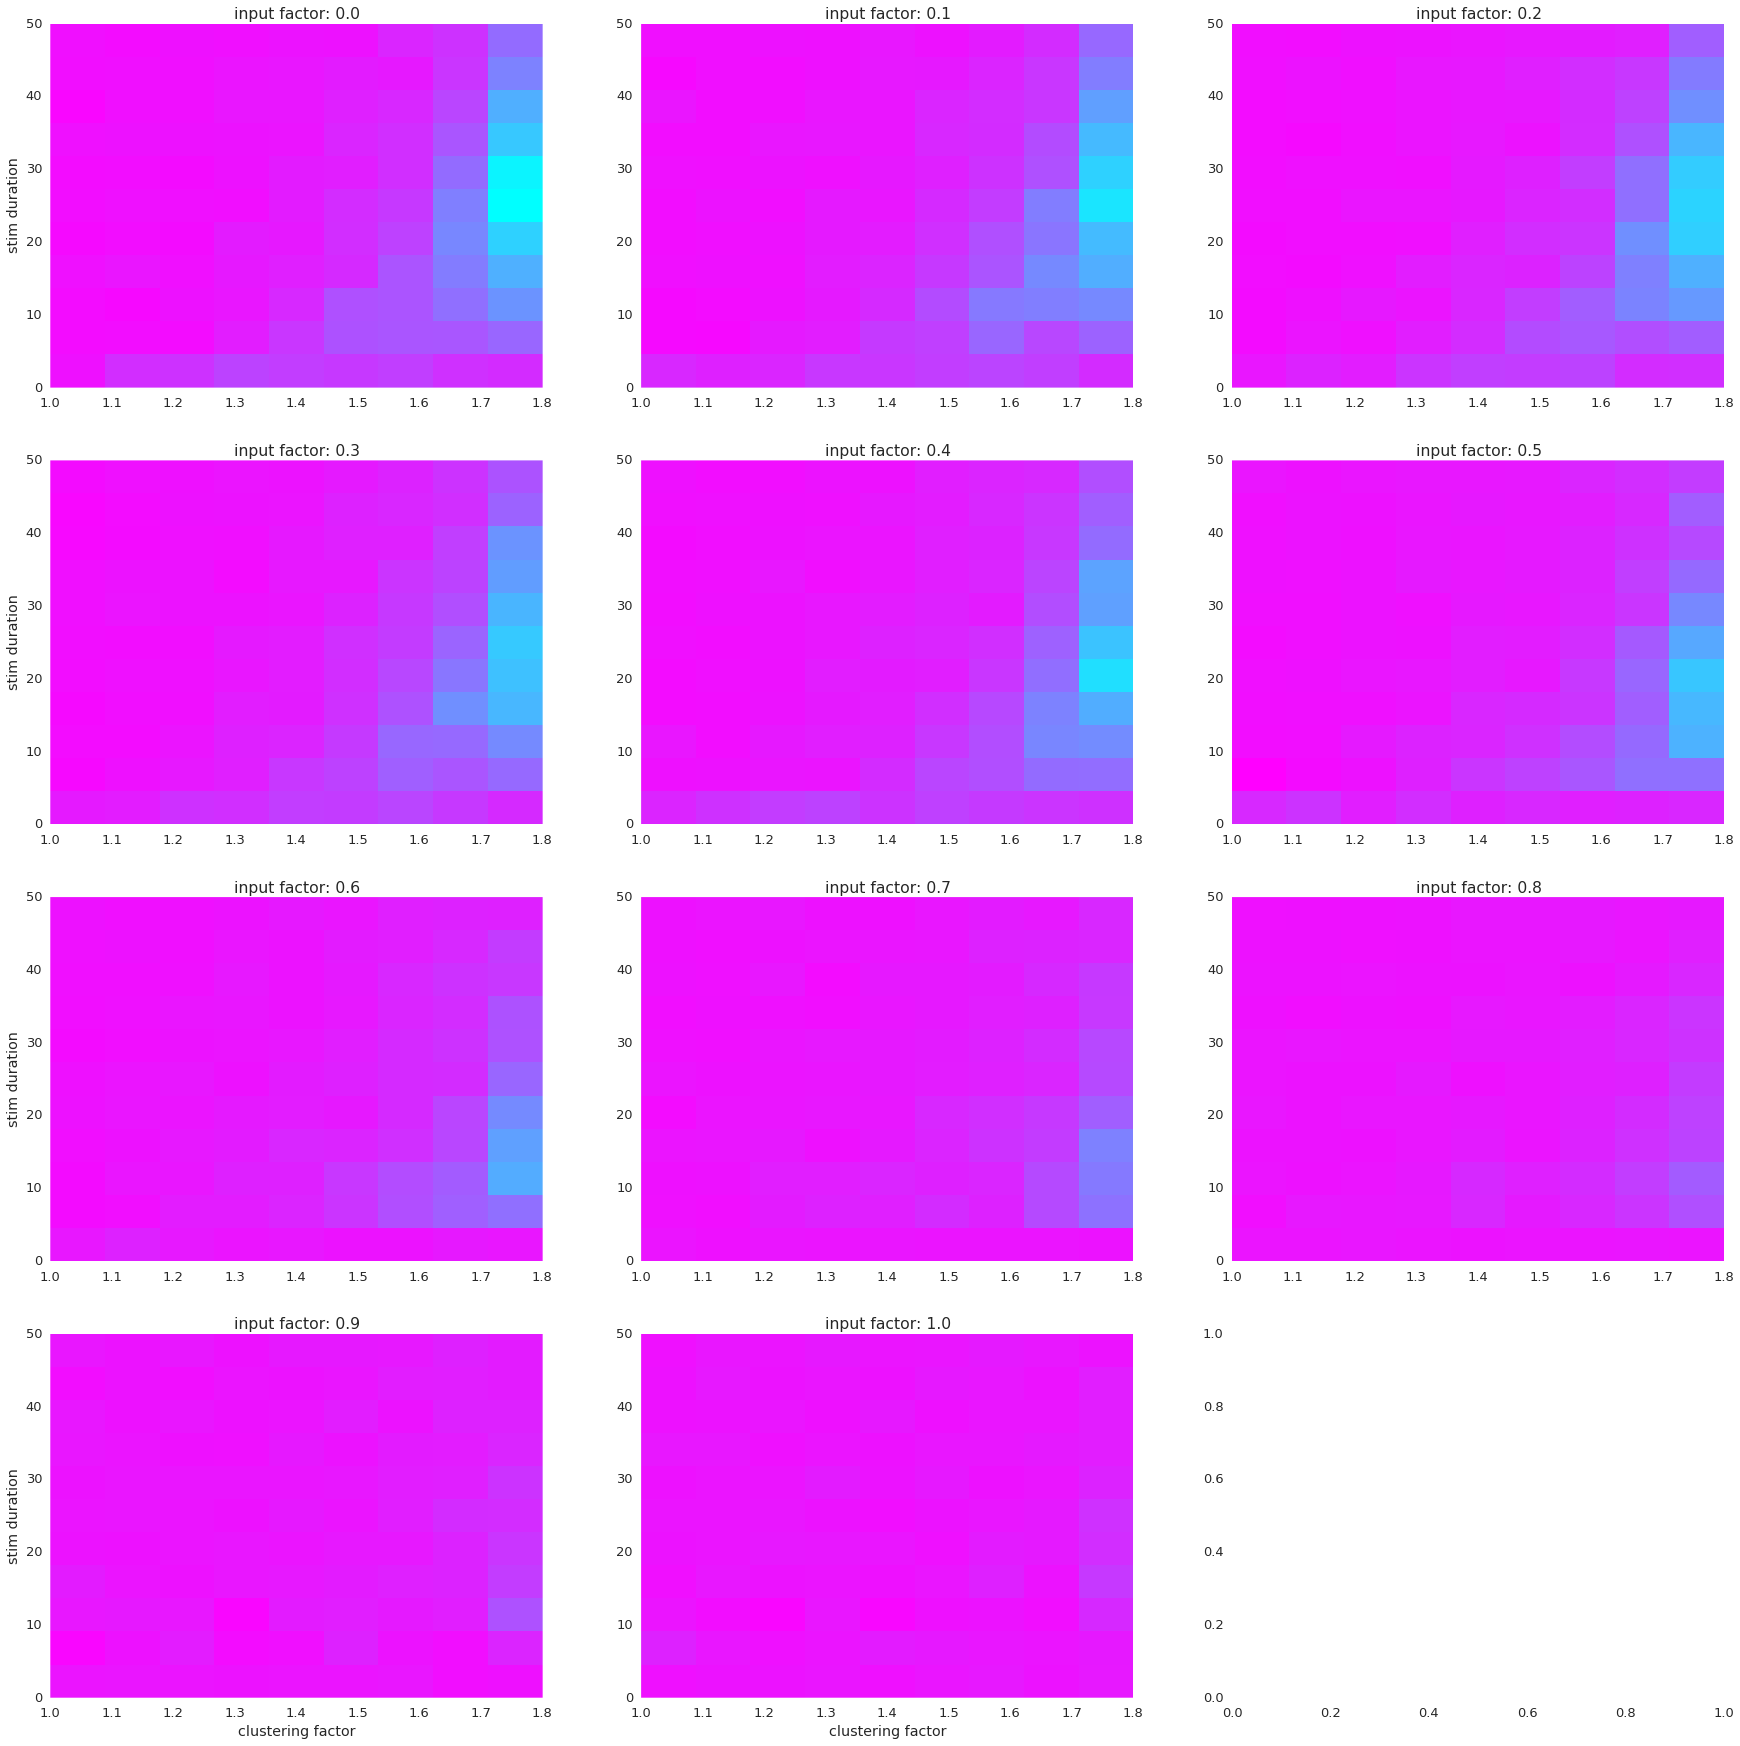

In [279]:
cutoff = sizes[2]-2
vmin, vmax = np.min(data[ch,:,:,:cutoff]), np.max(data[ch,:,:,:cutoff])
lims = [params['values'][2][0], params['values'][2][cutoff-1], params['values'][1][0], params['values'][1][-1]]

nrows, ncols = 4, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,30))
axes = axes.flatten()[:-1]

for i in xrange(sizes[0]):
    dat = data[ch,i,:,:cutoff]
    ax = axes[i]
    val = ordering['values'][0][i]
    ax.imshow(dat, origin='bottom', cmap='cool', vmin=vmin, vmax=vmax,
              extent=lims, interpolation='None')
    ax.set_aspect('auto')
    ax.set_title('input factor: {}'.format(str(val)))

    if i > nrows*(ncols-1):
        ax.set_xlabel('clustering factor')
    if i % ncols == 0:
        ax.set_ylabel('stim duration')
        
plt.savefig('uniform-color.eps')

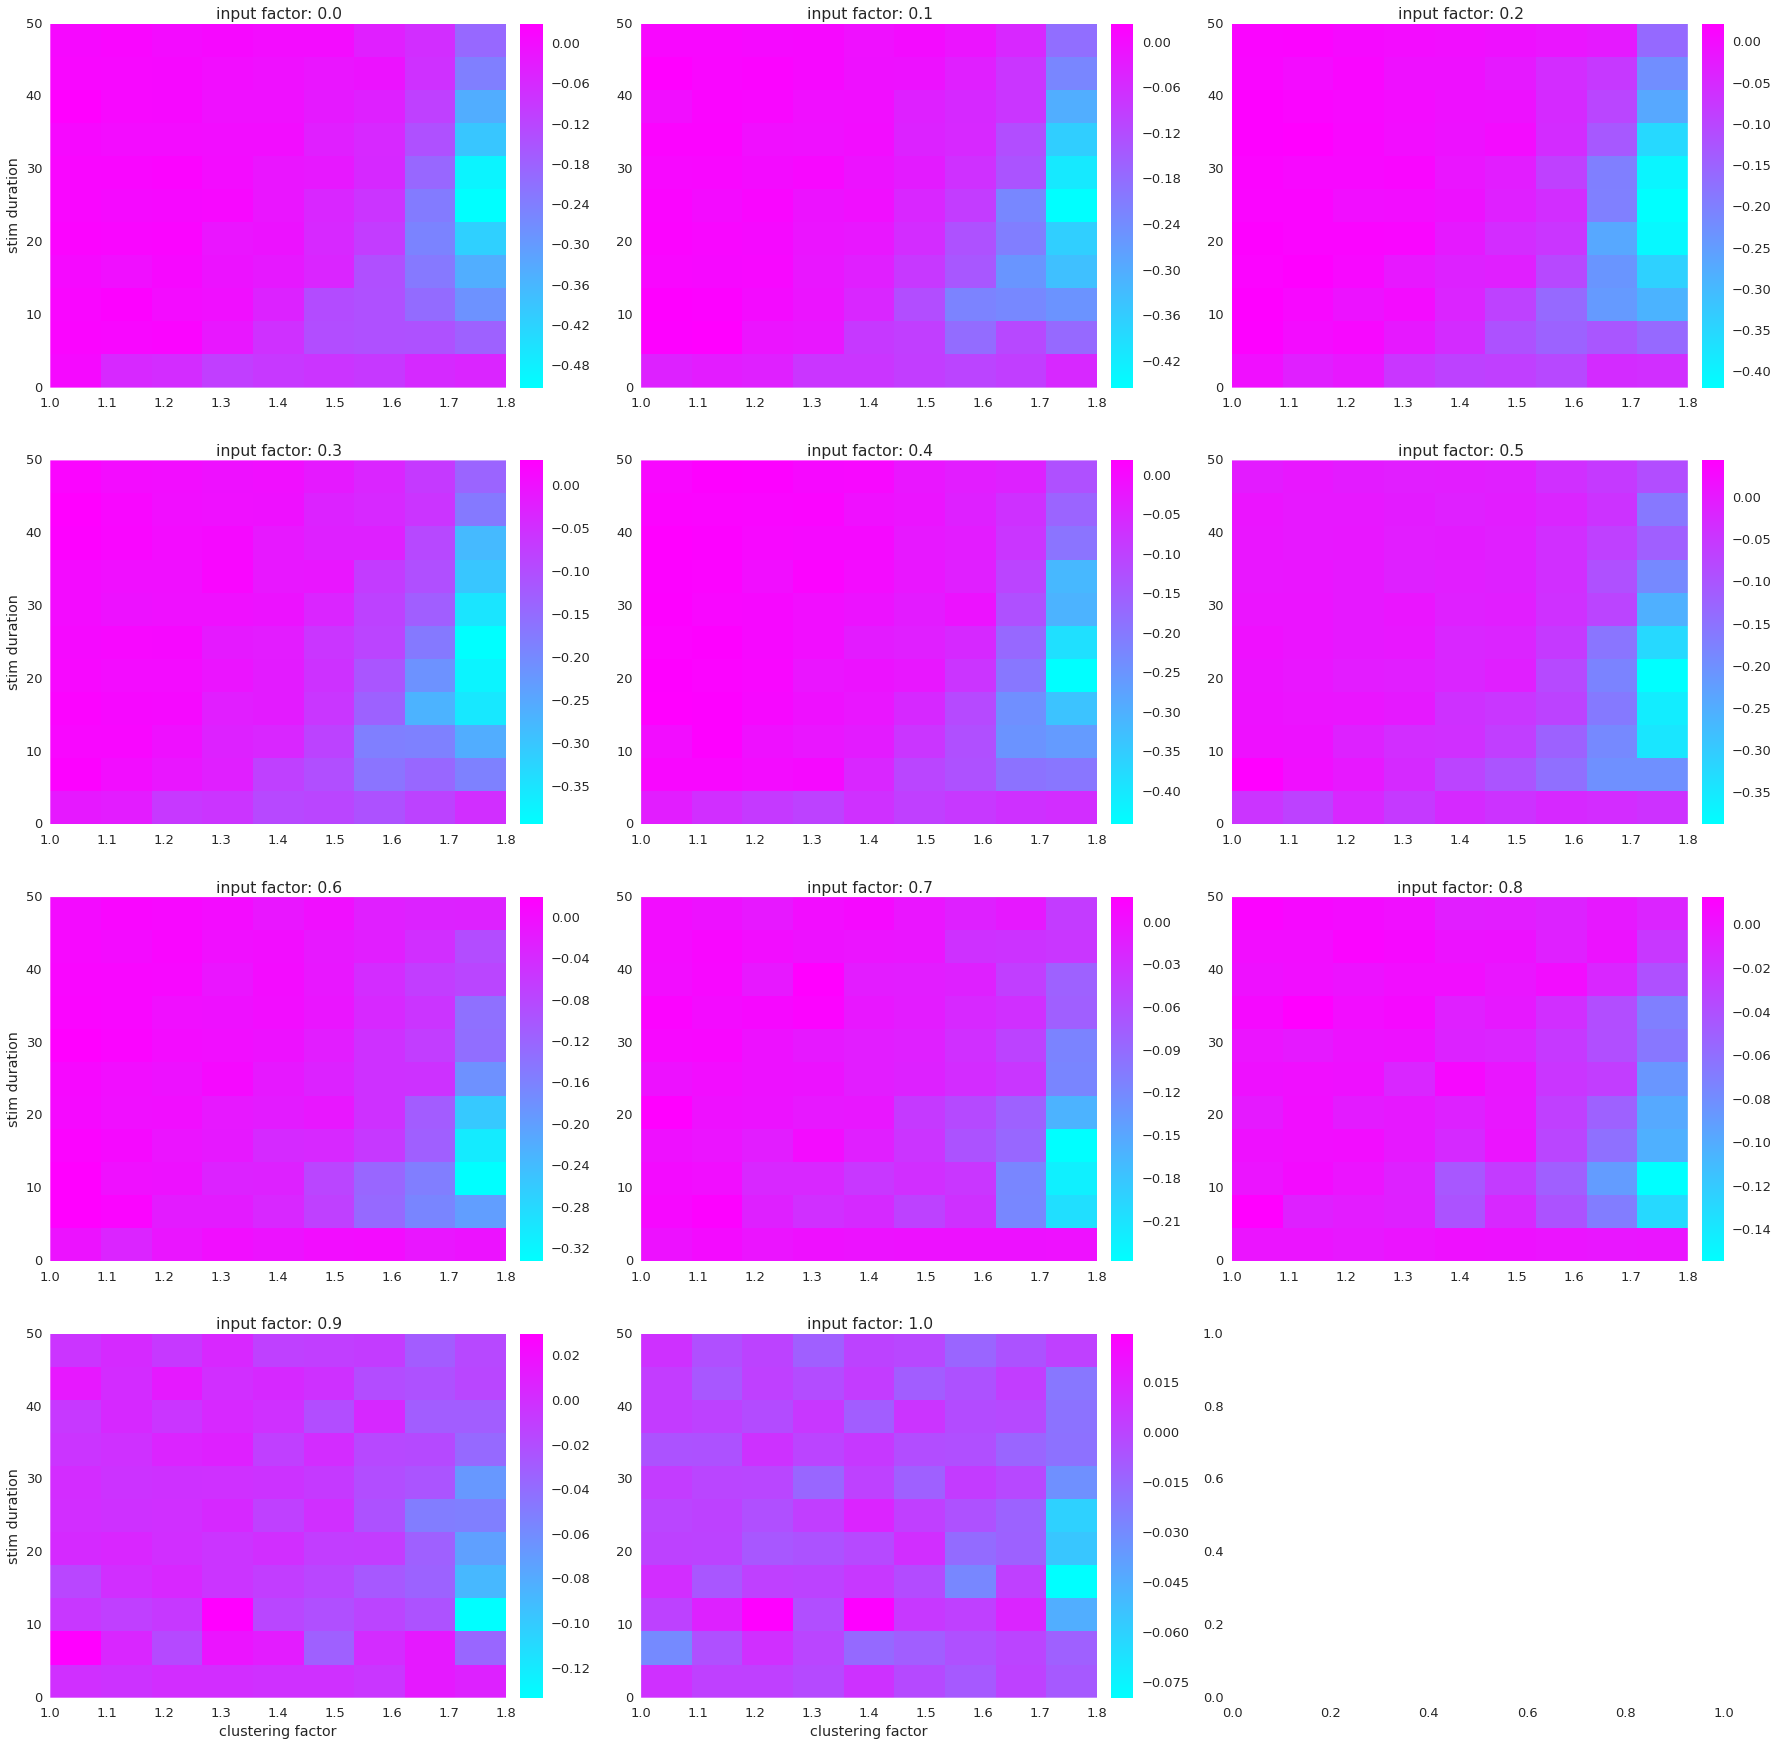

In [280]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,30))
axes = axes.flatten()[:-1]

for i in xrange(sizes[0]):
    dat = data[ch,i,:,:cutoff]
    ax = axes[i]
    val = ordering['values'][0][i]
    im = ax.imshow(dat, origin='bottom', cmap='cool',
                    extent=lims, interpolation='None')
    ax.set_aspect('auto')
    ax.set_title('input factor: {}'.format(str(val)))
    
    divider = ag1.make_axes_locatable(ax)
    cax = divider.append_axes("right", "5%", pad="3%")
    plt.colorbar(im, cax=cax)
    
    if i > nrows*(ncols-1):
        ax.set_xlabel('clustering factor')
    if i % ncols == 0:
        ax.set_ylabel('stim duration')
        
plt.savefig('varied-color.eps')

In [221]:
for (v1, v2) in zip(params['params'], params['values']):
    print v1, v2
    print '-------------'

[u'stimulus', u'input_factor'] [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
-------------
[u'stimulus', u'jitter', u'peak'] [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
-------------
[u'connectivity', u'Wcc_factor'] [ 1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
-------------


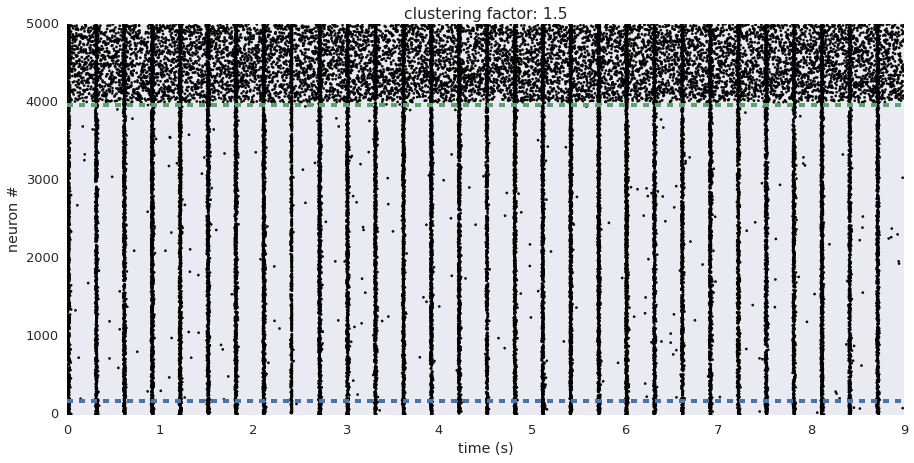

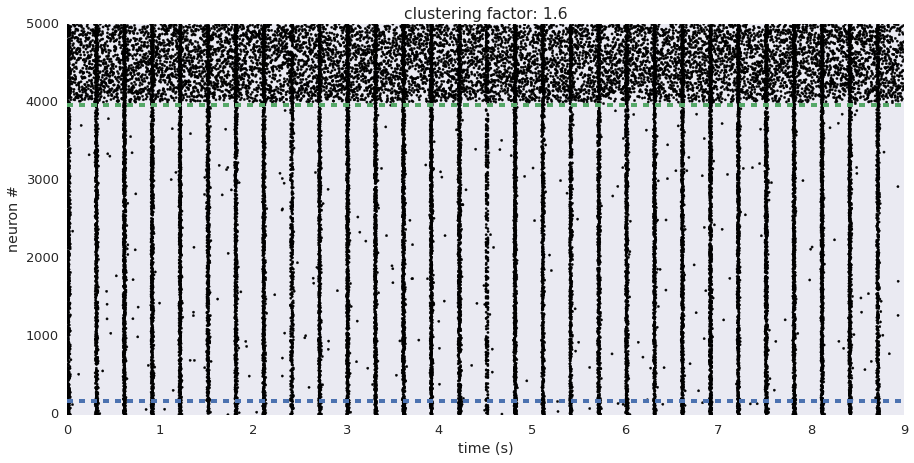

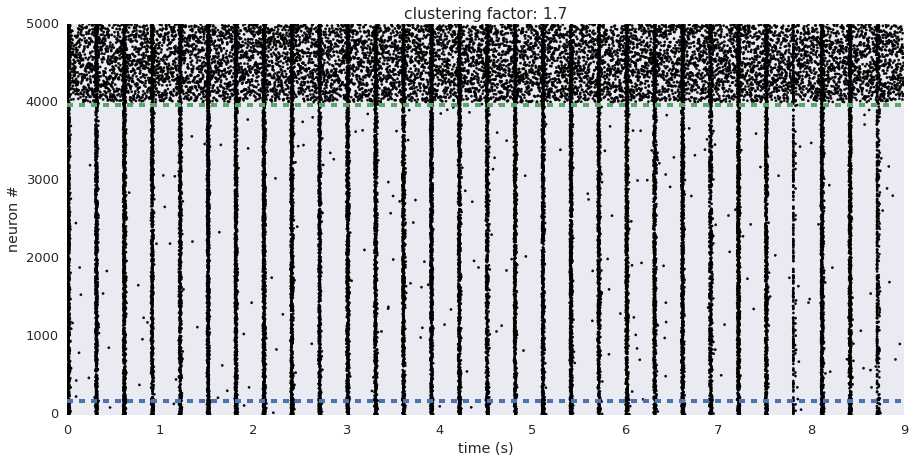

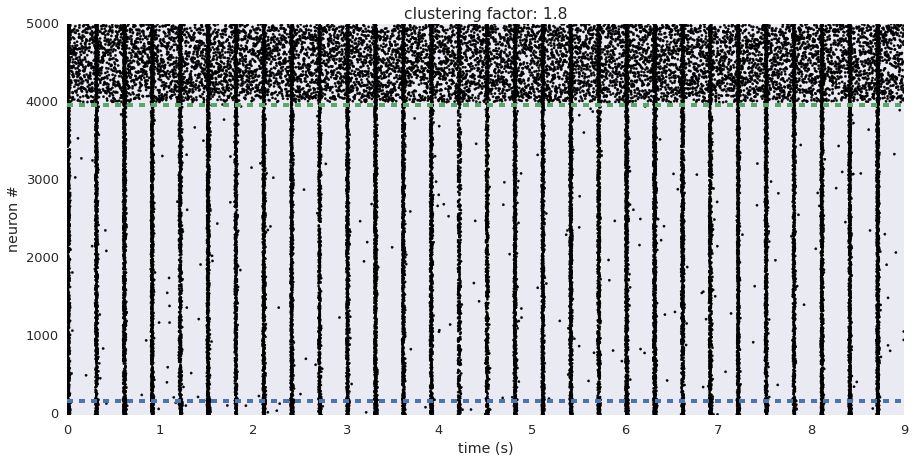

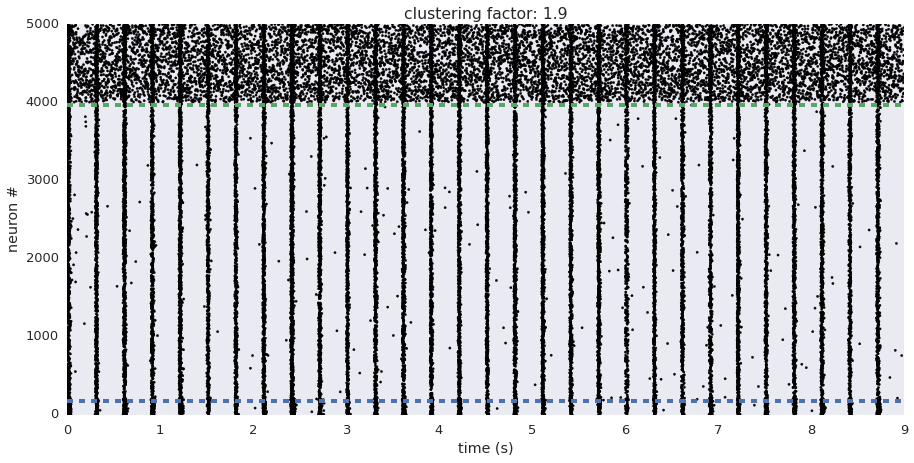

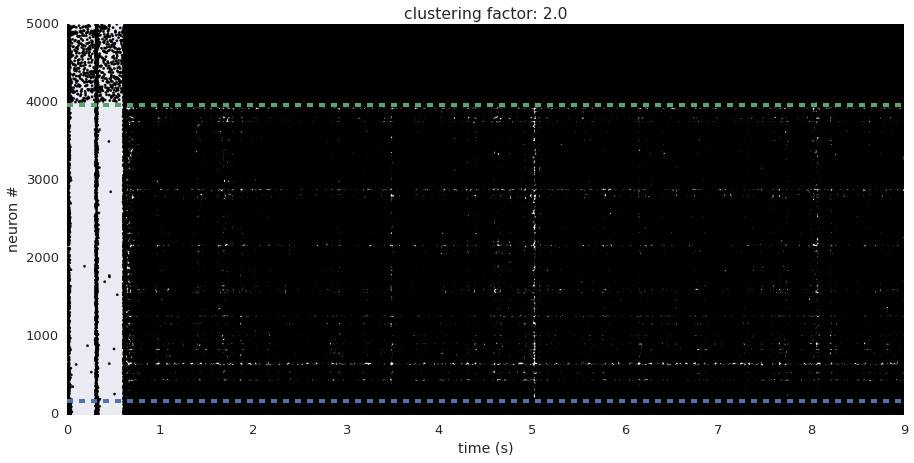

In [230]:
i = 10
j = 3
for k in xrange(5,11):
    results = np.load('result-{}-{}-{}.npz'.format(i,j,k))
    times, ids = results['spike_times_pre'], results['spike_ids_pre']
    idx = np.where(times<9.0)
    times, ids = times[idx], ids[idx]
    plt.figure(figsize=(15,7))
    utils.plotSpikes(times, ids, lines=inds[1:-1])
    plt.title('clustering factor: {}'.format(params['values'][2][k]))